# Análise dos microdados ENEM 2021
No notebook a seguir, é analisado o conjunto de dados do Exame Nacional do Ensino Médio do ano de 2021.
O objetivo da análise é entender como as variáveis envolvidas se relacionam com a média da nota das quatro provas e, posteriormente, tentativa de predição do valor da nota média com base nas variáveis disponíveis.
## Carregamento dos conjuntos de dados e metadados

In [1]:
import boto3
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
def read_dataset(key):
    
    s3client = boto3.client('s3', region_name='sa-east-1') 
    response = s3client.get_object(Bucket='meusdatasets', Key=key)

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print("Tentativa de recuperação de arquivo S3 bem-sucedida")
        
        if key.endswith('csv'):
            dataframe = pd.read_csv(response.get("Body"), encoding="latin_1", sep=";", encoding_errors='ignore')
            
        elif key.endswith('CSV'):
            dataframe = pd.read_csv(response.get("Body"), sep = ';', encoding="latin_1", encoding_errors='ignore',
                                    nrows = 76, header = None, usecols = [0,1])
        
    else:
        print(f"Tentativa de recuperação de arquivo S3 malsucedida. Status - {status}")
        
    return dataframe
    
microdados = read_dataset('ENEM2021/MICRODADOS_ENEM_2021.csv')
dicionario_dados = read_dataset('ENEM2021/DICIONARIO.CSV')

Tentativa de recuperação de arquivo S3 bem-sucedida
Tentativa de recuperação de arquivo S3 bem-sucedida


In [3]:
microdados

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Macei,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redeno,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goinia,52,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,5.0,C,C,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,20

In [4]:
dicionario_dados

,0,1
0,NU_INSCRICAO,Nmero de inscrio
1,NU_ANO,Ano do Enem
2,TP_FAIXA_ETARIA,Faixa etria
3,TP_SEXO,Sexo
4,TP_ESTADO_CIVIL,Estado Civil
5,TP_COR_RACA,Cor/raa
6,TP_NACIONALIDADE,Nacionalidade
7,TP_ST_CONCLUSAO,Situao de concluso do Ensino Mdio
8,TP_ANO_CONCLUIU,Ano de Concluso do Ensino Mdio
9,TP_ESCOLA,Tipo de escola do Ensino Mdio


In [5]:
# Obtenção da média simples com os resultados das quatro provas
microdados['MEDIA_SIMPLES'] = microdados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis = 1)

## Identificação e remoção de colunas desprezíveis
### Quantidade de valores únicos em cada variável

In [6]:
microdados.nunique().sort_values()

NU_ANO                          1
Q021                            2
Q025                            2
TP_LINGUA                       2
TP_LOCALIZACAO_ESC              2
Q023                            2
IN_TREINEIRO                    2
TP_ENSINO                       2
Q020                            2
TP_SEXO                         2
Q018                            2
TP_ESCOLA                       3
TP_PRESENCA_MT                  3
TP_PRESENCA_LC                  3
TP_PRESENCA_CH                  3
TP_PRESENCA_CN                  3
TP_ST_CONCLUSAO                 4
TP_DEPENDENCIA_ADM_ESC          4
TP_SIT_FUNC_ESC                 4
Q007                            4
Q022                            5
Q019                            5
Q009                            5
Q015                            5
Q010                            5
Q017                            5
Q012                            5
Q013                            5
Q014                            5
Q016          

Percebe-se que algumas categorias possuem cardinalidade muito elevada, as principais são as últimas 5. Essas variáveis não são úteis para a análise, pois são redundantes: quatro se traduzem em uma nota, o que é mais interpretável. O NU_INSCRICAO é apenas um identificador. As demais variáveis com alta cardinalidade (+1000 valores únicos) são igual e evidentemente desnecessárias, ou quantitativas contínuas. Há uma coluna com apenas de valor constante.

### Quantidade de valores nulos por coluna

In [7]:
microdados.isna().sum().sort_values()

NU_INSCRICAO                    0
TP_LINGUA                       0
TP_PRESENCA_MT                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_CN                  0
CO_UF_PROVA                     0
NO_MUNICIPIO_PROVA              0
CO_MUNICIPIO_PROVA              0
IN_TREINEIRO                    0
SG_UF_PROVA                     0
TP_ESCOLA                       0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ANO_CONCLUIU                 0
TP_ST_CONCLUSAO                 0
NU_ANO                          0
Q006                            2
Q011                            2
Q025                            2
Q008                            2
Q005                            2
Q004                            2
Q003                            2
Q009                            2
Q010                            2
Q007          

Verifica-se alta quantidade de valores nulos em algumas variáveis.
Além das colunas já mencionadas, outras serão removidas por outros motivos: ou são códigos para os quais há um nome correspondente, ou contém muitos valores nulos, ou representam a presença ou ausência de candidato em uma prova, o que também se traduz na nota, ou representam nível de detalhamento demasiadamente alto para uma análise concisa (como nome do município).

**Há mais faltantes nas provas de Matemática e Ciências da natureza (ambas realizadas no segundo dia) do que as demais**, talvez porque os candidatos pensaram que foram mal no primeiro dia. Se a média nas provas de ciências humanas e linguagens dos alunos que faltaram no segundo dia for inferior a dos que não faltaram com uma diferença estatisticamente significativa, essa possibilidade que não pode ser descartada, pois os candidatos têm acesso a correções das provas logo após as mesmas e teriam uma ideia do seu próprio desempenho, avaliando o custo x benefício de comparecer no segundo dia de prova com base nisso.
#### Vamos investigar:

In [8]:
hipotese_df = microdados.copy()

# A condição é que o candidato não tenha nota em nenhuma prova do segundo dia 
# e tenha valor não nulo em menos uma no primeiro.
hipotese_df['COND_SATISFEITA'] = np.where((hipotese_df['NU_NOTA_MT'].isnull()) & (hipotese_df['NU_NOTA_CN'].isnull()) &
                              ((hipotese_df['NU_NOTA_LC'].notnull()) | (hipotese_df['NU_NOTA_CH'].notnull())),
                              1,0)

<Axes: title={'center': 'Nota em Linguagens e Códigos'}, ylabel='COND_SATISFEITA'>

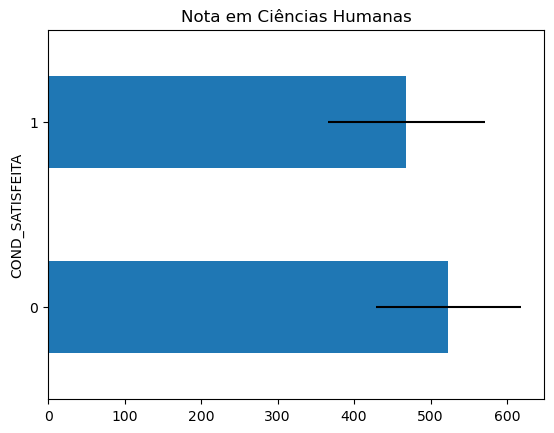

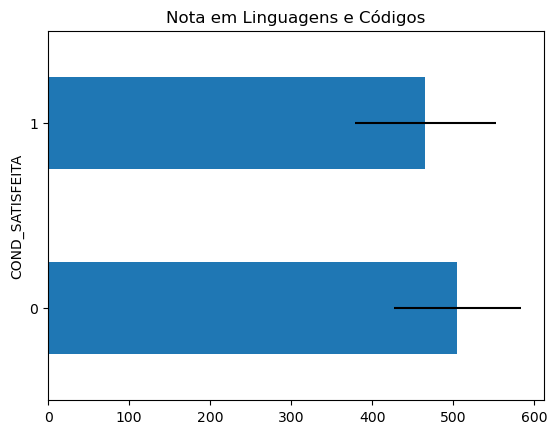

In [9]:
grouped_df = hipotese_df.groupby('COND_SATISFEITA')[['NU_NOTA_CH', 'NU_NOTA_LC']].agg(['mean','std'])
grouped_df['NU_NOTA_CH'].plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Nota em Ciências Humanas")
grouped_df['NU_NOTA_LC'].plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Nota em Linguagens e Códigos")

O valor 1 corresponde a sim e 0, ao não. É fácil observar que quem atende a condição tem uma média menor que os que não atendem.
### Mas seria essa diferença estatisticamente significativa?

In [10]:
group_1 = hipotese_df.where(hipotese_df['COND_SATISFEITA'] == 1)
group_0 = hipotese_df.where(hipotese_df['COND_SATISFEITA'] == 0)

group_1_lc = group_1['NU_NOTA_LC']
group_0_lc = group_0['NU_NOTA_LC']
group_1_ch = group_1['NU_NOTA_CH']
group_0_ch = group_0['NU_NOTA_CH']

In [11]:
group_1_lc.dropna(inplace=True)
group_0_lc.dropna(inplace=True)

stats.ttest_ind(group_1_lc, group_0_lc, equal_var = False)

Ttest_indResult(statistic=-166.04355718770574, pvalue=0.0)

In [12]:
group_1_ch.dropna(inplace=True)
group_0_ch.dropna(inplace=True)

stats.ttest_ind(group_1_ch, group_0_ch, equal_var = False)

Ttest_indResult(statistic=-194.70216921556164, pvalue=0.0)

A estatística-t associada ao p-valor 0 mostra que as médias das notas dos candidatos que foram no primeiro dia e faltaram no segundo é menor que a dos demais com quase 100% de certeza, tanto na prova de linguagens quanto na prova de ciências humanas. Então, não é impossível que tenham se ausentado por esse motivo, dado o desempenho inferior em relação aos outros.

### Outras variáveis: 

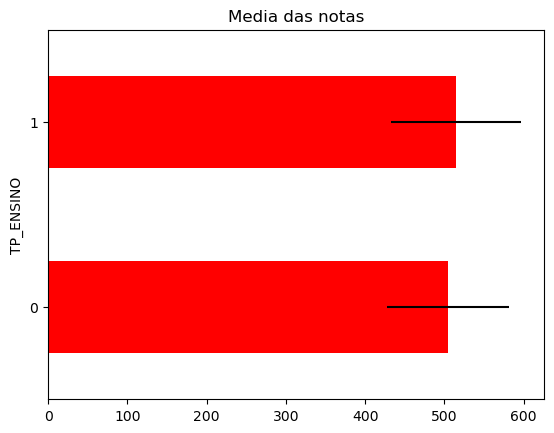

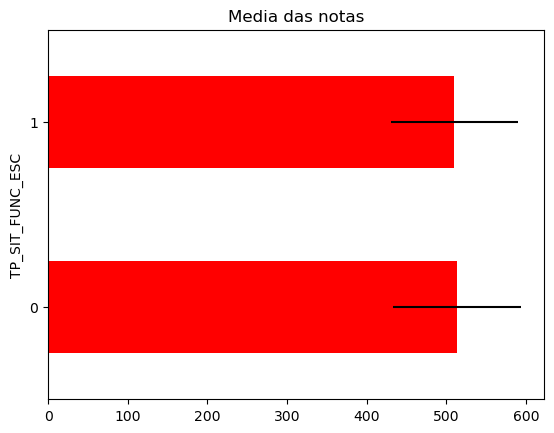

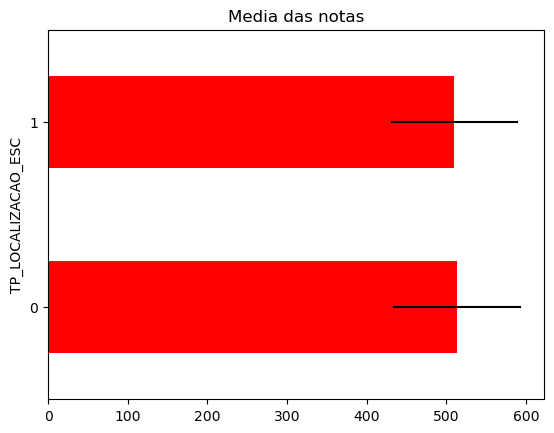

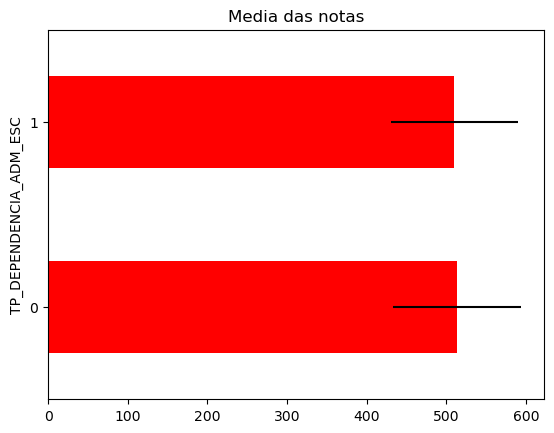

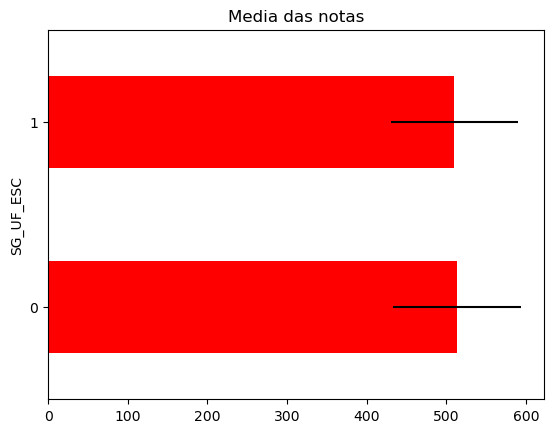

In [13]:
def analisar_valores_nulos(df, col):
    df_slice = df[[col, 'MEDIA_SIMPLES']].copy()
    df_slice[col] = np.where(df_slice[col].isnull(),1,0)
    tmp = df_slice.groupby(col)['MEDIA_SIMPLES'].agg(['mean','std'])
    tmp.plot(kind='barh',y = 'mean', legend = False, 
             xerr='std',title='Media das notas', color = 'red')
    plt.show()

valores_com_nulo = ['TP_ENSINO',
'TP_SIT_FUNC_ESC',
'TP_LOCALIZACAO_ESC',
'TP_DEPENDENCIA_ADM_ESC',
'SG_UF_ESC'
]

for coluna in valores_com_nulo:
    analisar_valores_nulos(microdados, coluna)

O valor 1 denota presença de dado e 0, um valor nulo. Visualmente, média da nota nos dois casos é praticamente igual para todas as variáveis analisadas. Elas também serão removidas. 

### Remoção das colunas pouco úteis

In [14]:
colunas_dropaveis = [
                     'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 
                     'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                     'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN',
                     'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN',
                     'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'NU_NOTA_COMP1', 
                     'NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'TP_STATUS_REDACAO',
                     'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT',
                     'TP_ENSINO', 'TP_SIT_FUNC_ESC', 'SG_UF_ESC', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA',
                     'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN'
                    ]

microdados.drop(colunas_dropaveis, axis=1, inplace = True)

## Análise dos dados por tipo de variável
### Variáveis qualitativas

In [15]:
variaveis_categoricas = microdados.drop(['NU_NOTA_REDACAO', 'MEDIA_SIMPLES'], axis=1)

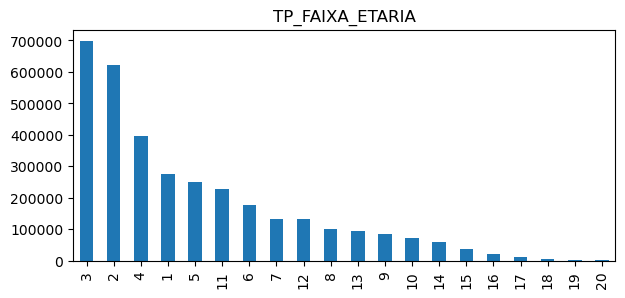

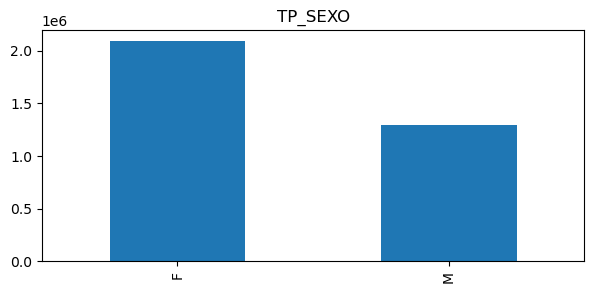

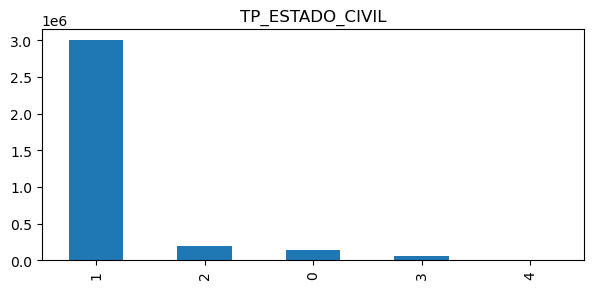

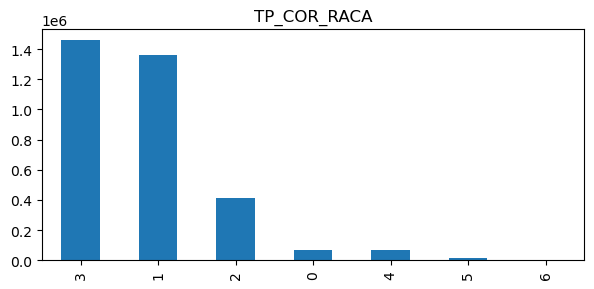

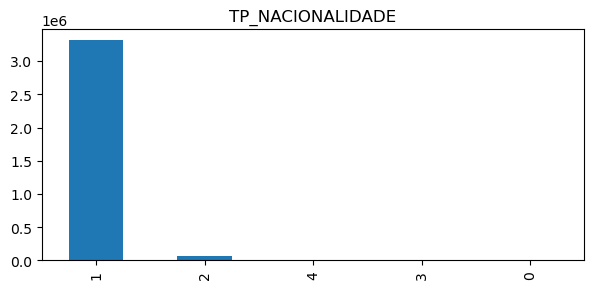

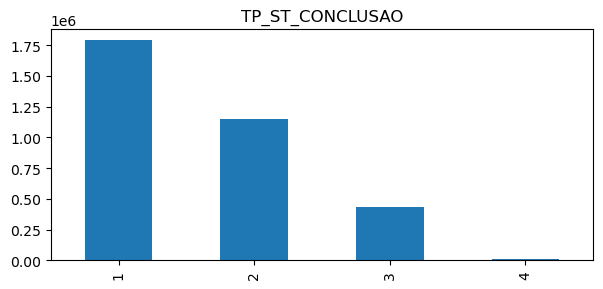

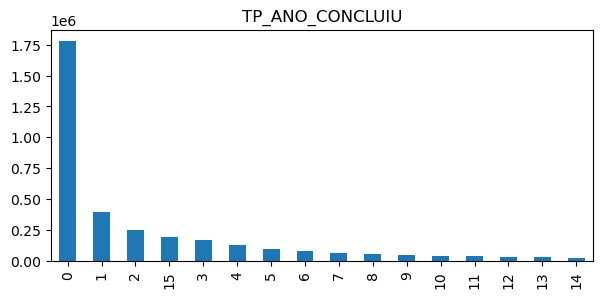

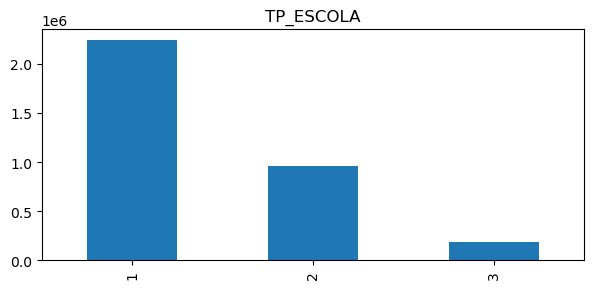

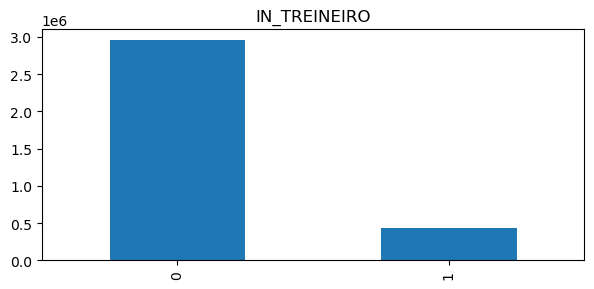

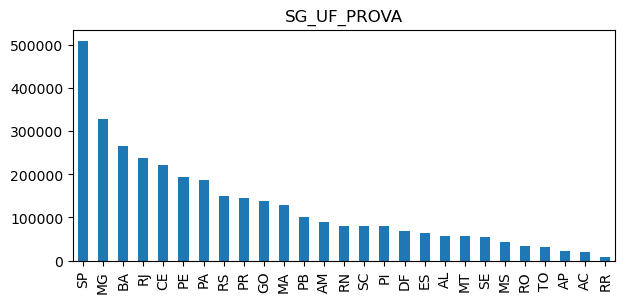

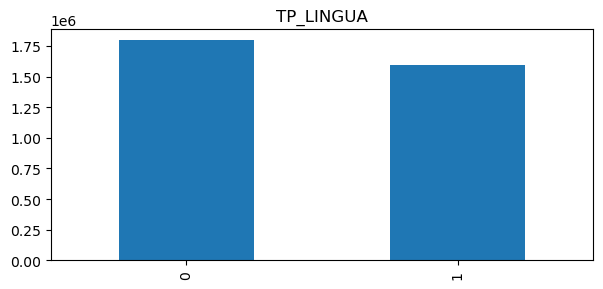

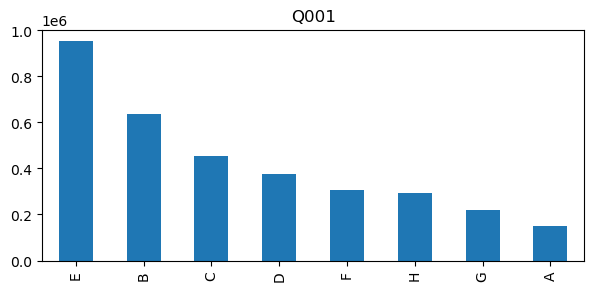

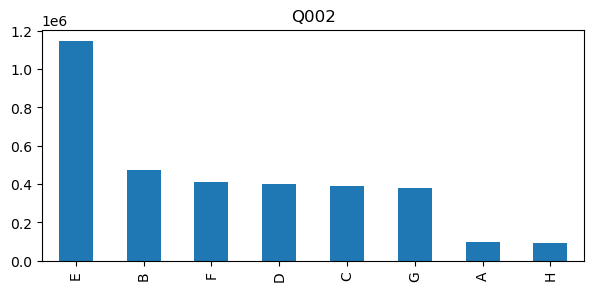

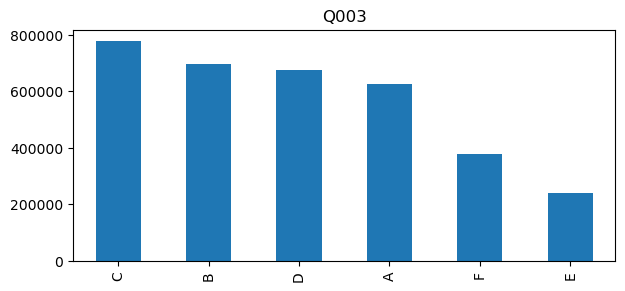

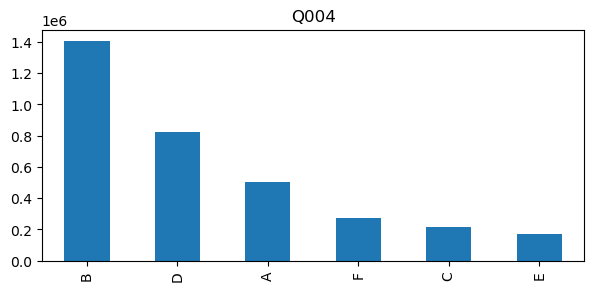

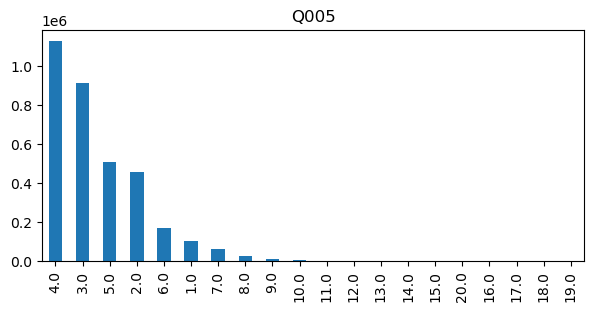

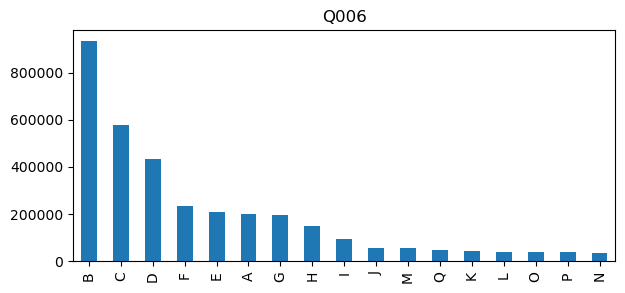

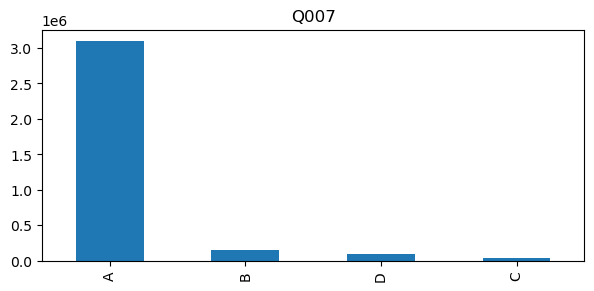

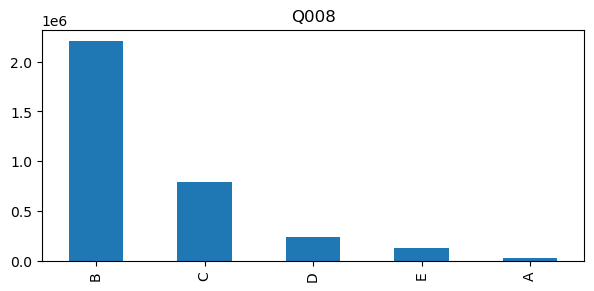

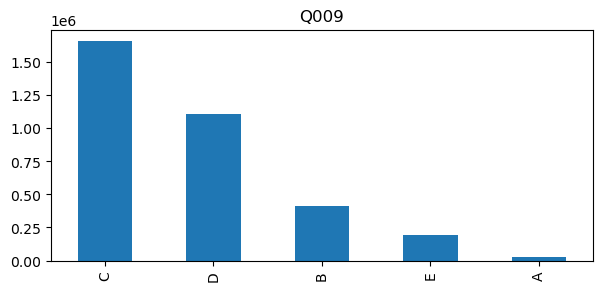

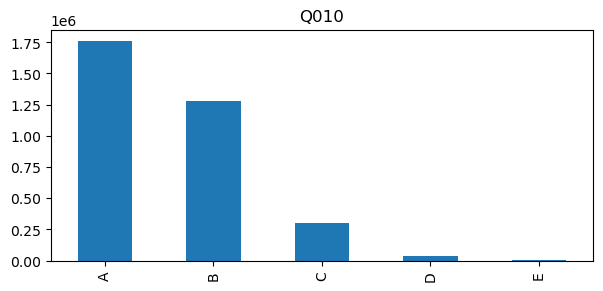

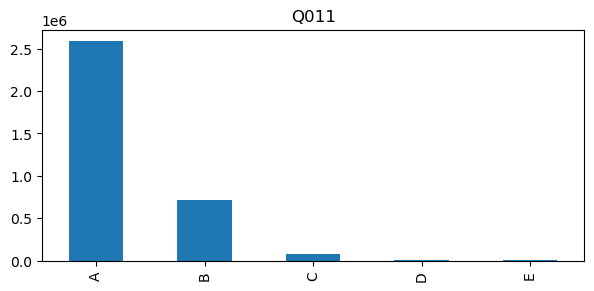

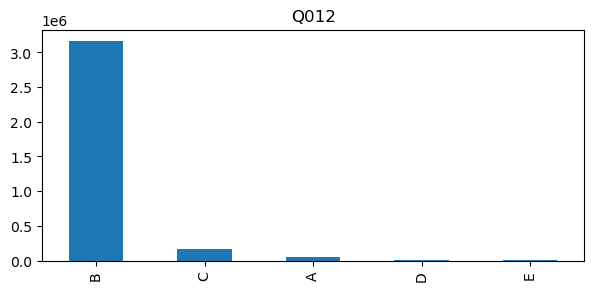

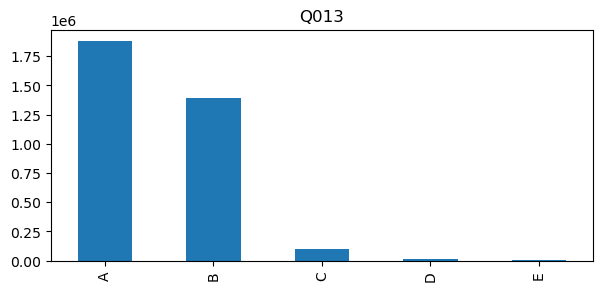

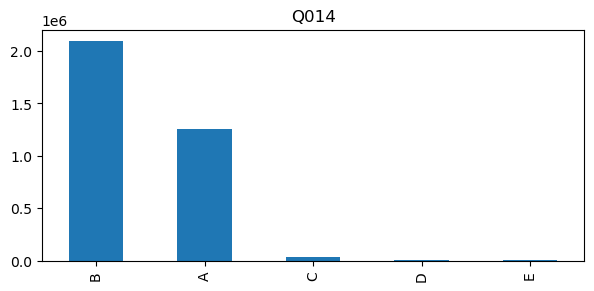

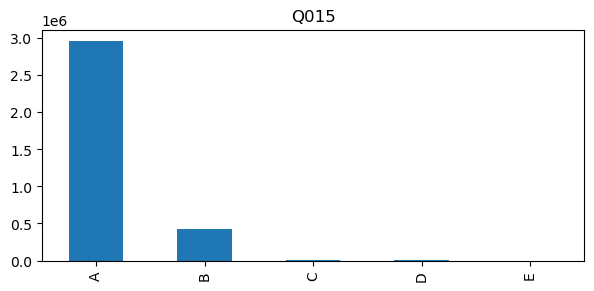

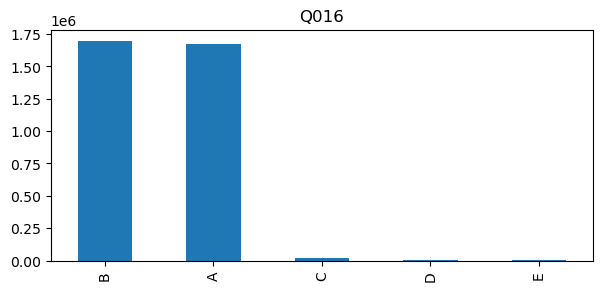

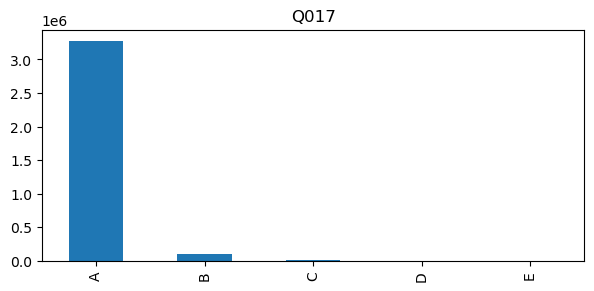

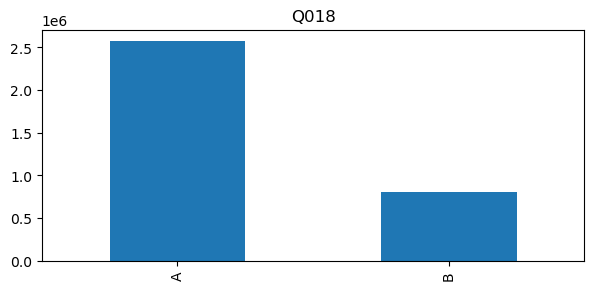

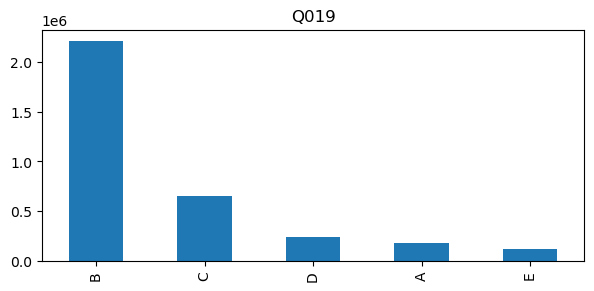

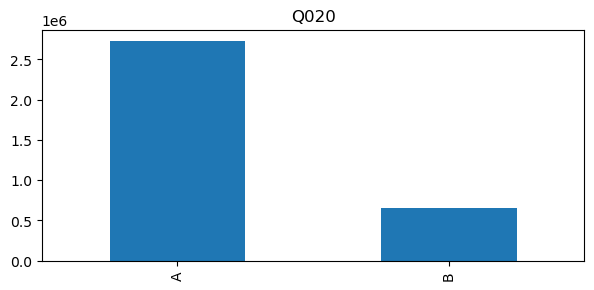

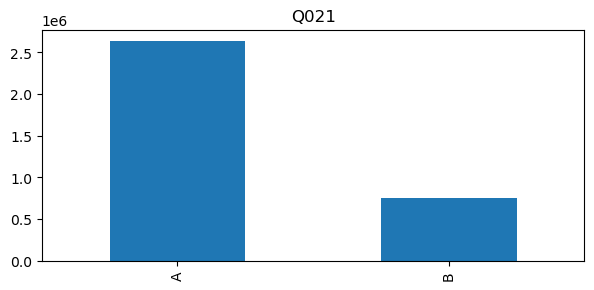

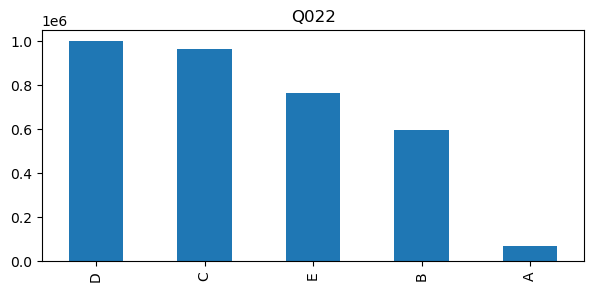

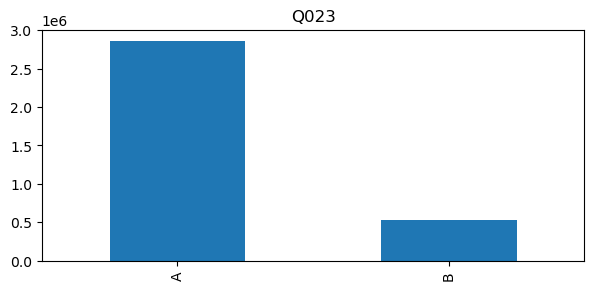

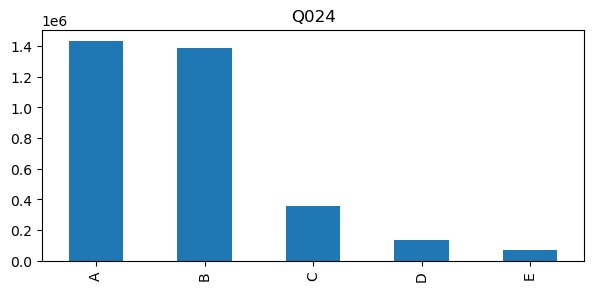

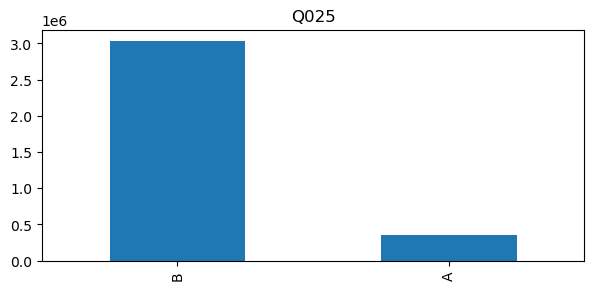

In [16]:
for coluna in variaveis_categoricas.columns:
    plt.figure(figsize=(7,3))
    microdados[coluna].value_counts().plot(kind='bar', title = coluna)
    plt.show()

Infere-se, dos gráficos acima:
- Faixas etária com maior número de inscritos: **18 anos**.
- Mais **mulheres** que homens se candidataram ao exame.
- Maioria esmagadora dos candidatos são **solteiros**. 
- **pardos e brancos** são, respectivamente, as cores de pele mais declaradas, os pretos somam pouco mais de 10% de candidatos.
- Praticamente a totalidade dos candidatos são **brasileiros natos**.
- Mais da metade dos candidatos **já concluíram o ensino médio** e mais de um milhão **concluiria em 2021**.
- Aproximadamente 1.75 milhão de candidatos **não informaram** há quanto tempo concluiu o Ensino Médio.
- Maioria dos candidatos **não informou** o tipo de escola que frequenta(ou), mas menos de 10% afirmaram vir de escola **particular**.
- Menos de 500 mil, frente aos 3 milhões de registros restantes, são **treineiros**.
- Os estados de **São Paulo, Minas Gerais e Bahia** contam com os maiores números de candidatos e o estado com menos inscritos é **Roraima**.
- Um número pouco maior de candidatos escolheram **Inglês** como idioma estrangeiro.
- Os pais e mães de quase um terço dos candidatos **completaram o Ensino Médio**, mas a segunda categoria mais presente é a dos que **não chegaram à 4ª série do Ensino Fundamental**, para ambos os pais.
- A **menor parte** dos candidatos tem os pais e mães no **grupo 5**, composto pelas profissões/empresários em tese com mais prestígio e condições financeiras dentre todos os grupos profissionais, mas a maior categoria de ocupação dos pais é o **grupo 3** (padeiros, cozinheiros, sapateiros, operadores de máquinas, pedreiros, pintores, eletricistas...), a mais presente nas mães é o **grupo 2** (diarista, empregadas domésticas, cuidadoras de idosos, babás...).
- Maioria dos candidatos têm **4 ou 3** pessoas morando na mesma casa.
- Mais de 800 mil candidatos possuem renda familiar mensal de **até 1100 Reais**, outros 600 mil **até 1650 Reais**.
- Nos lares de quase todos os candidatos **não há empregado(a) doméstico(a)**.
- Maioria das residências conta com apenas **um** banheiro, **dois** dormitórios, **nenhum** carro e **nenhuma** moto.
- Em quase todos os lares têm **uma** geladeira, **sem** freezer, com **uma** máquina de lavar roupa, **sem** secadora, **não** há  máquina de lavar louças, **nem** aspirador de pó.
- Aproximadamente metade dos lares tem **um** microondas, a outra não tem nenhum.
- Cerca de 2.5 milhões de candidatos têm **uma** televisão em casa, **não têm** DVD e **não têm** TV por assinatura.
- Por volta de 1 milhão de candidatos têm **3** celulares em casa, a maioria possui **3 ou 2**. Além disso, o telefone fixo está **ausente** em quase 3 milhões de lares.
- Cerca de 1.4 milhão de candidatos afirmaram que **não** possuem computador, estatística seguida de perto pelos que afirmaram  possuir **1** computador em casa, apesar de que 3 milhões afirmam **possuir** acesso à internet.

### Relação entre variável preditora e alvo

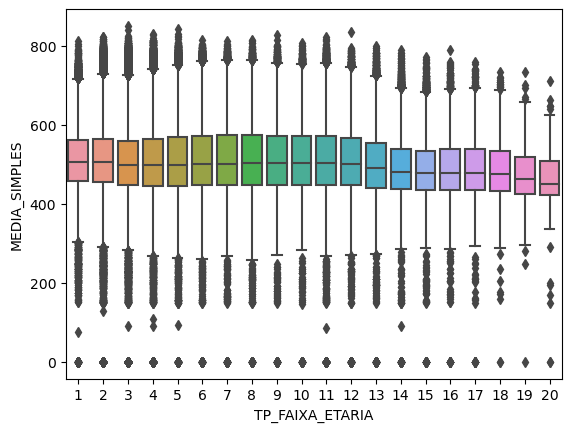

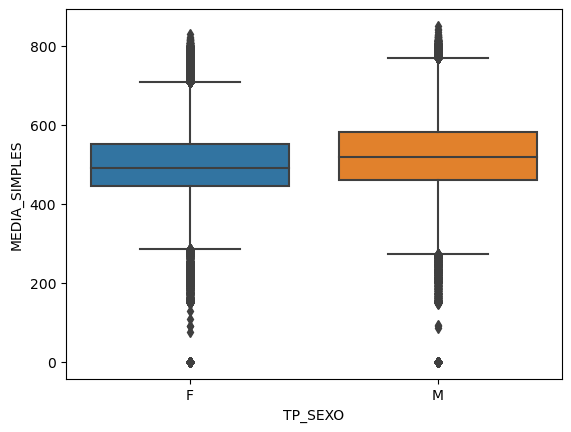

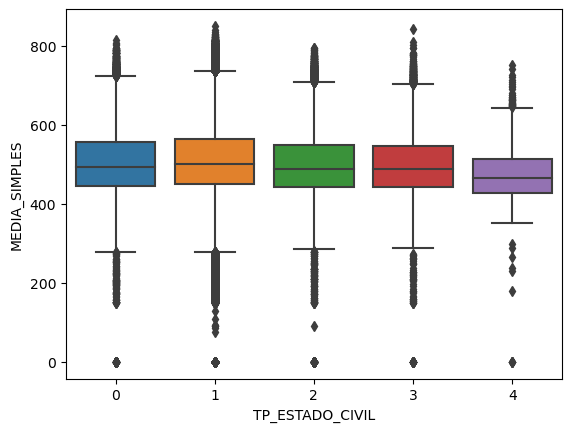

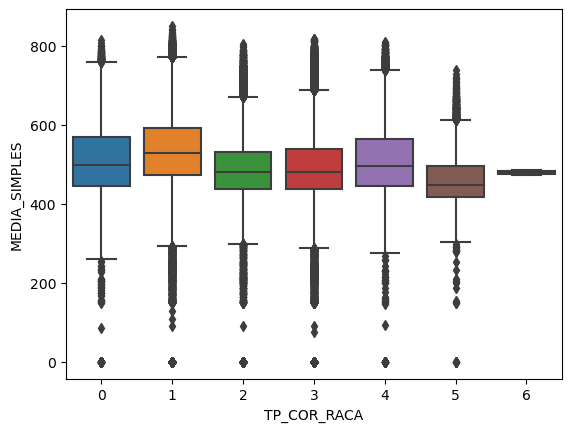

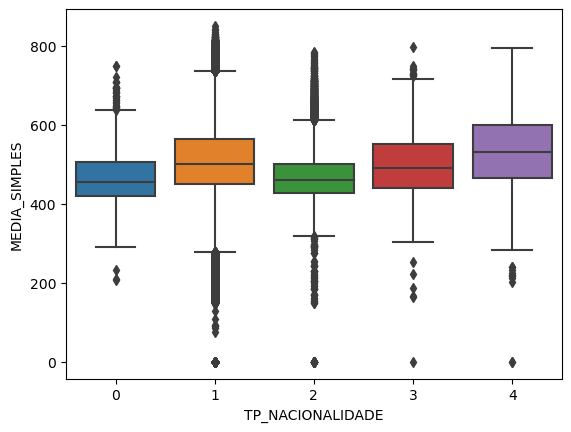

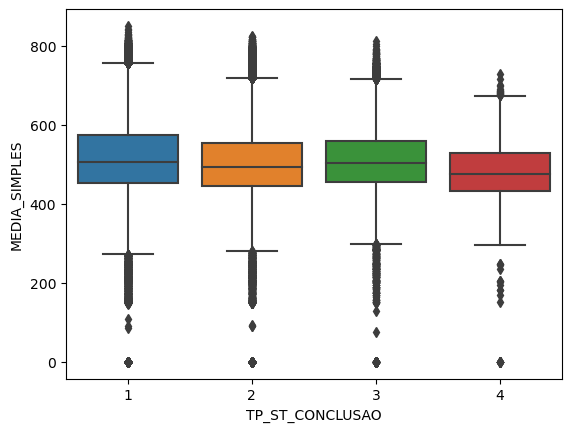

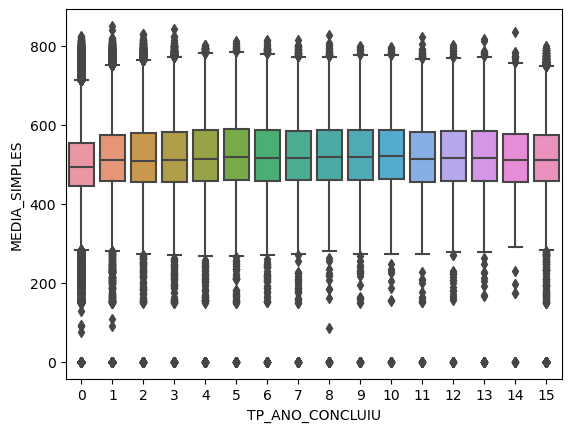

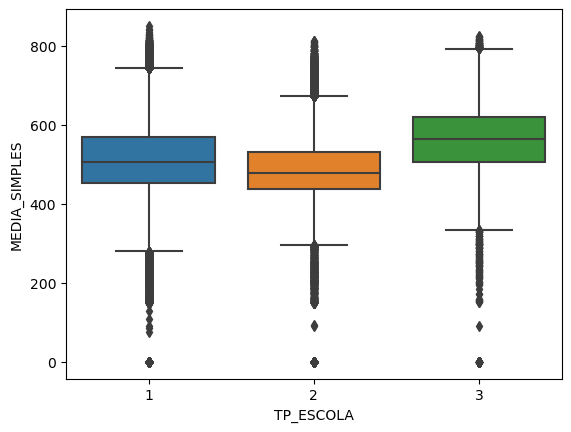

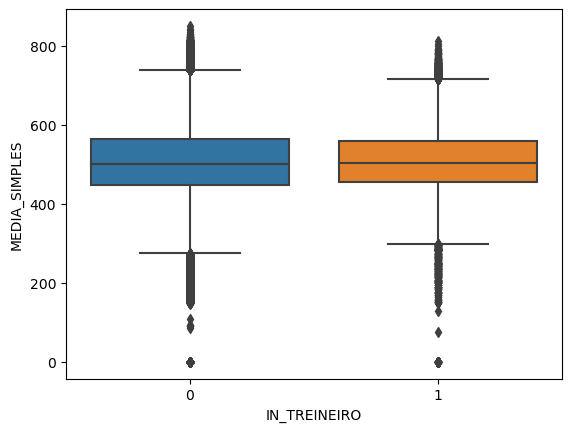

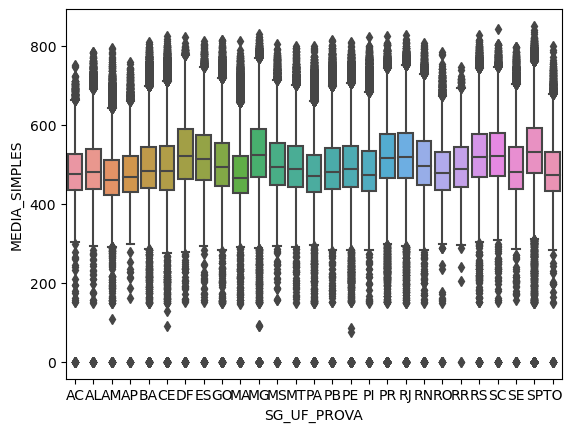

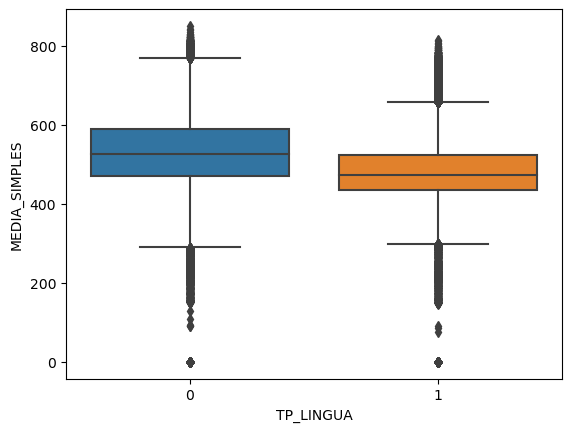

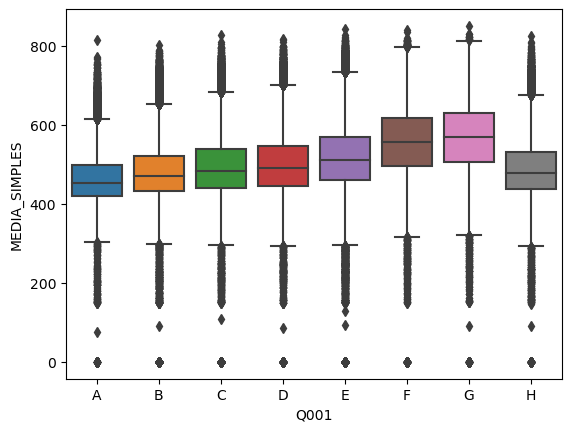

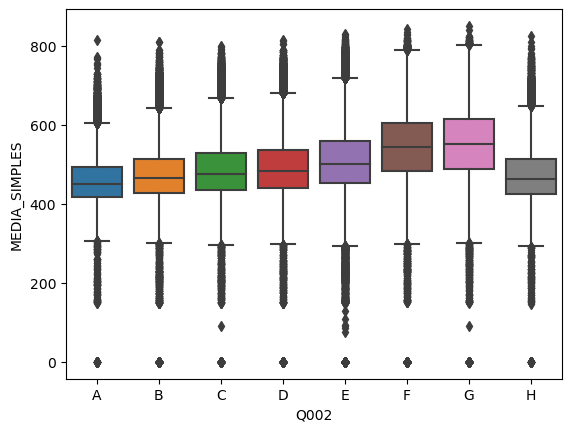

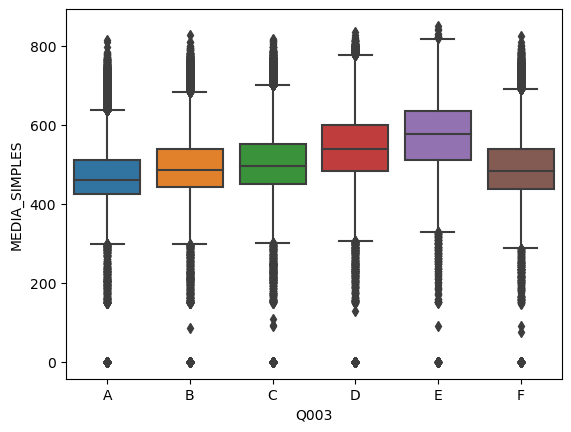

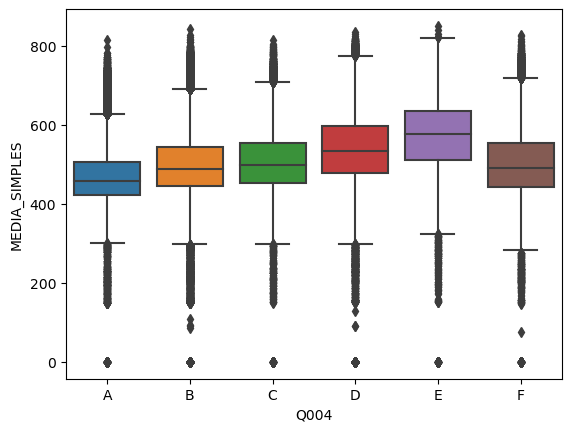

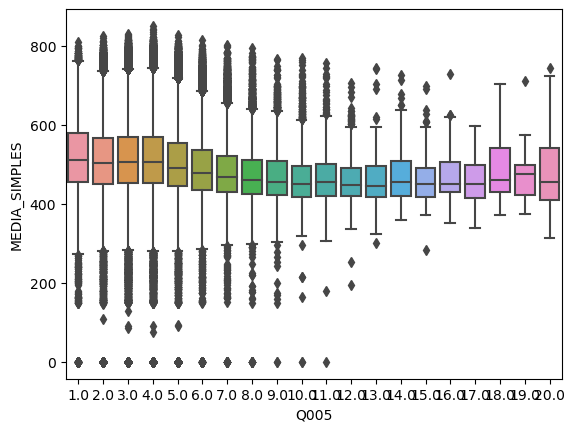

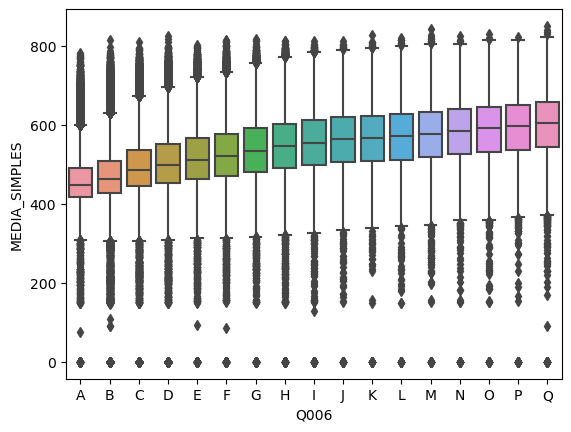

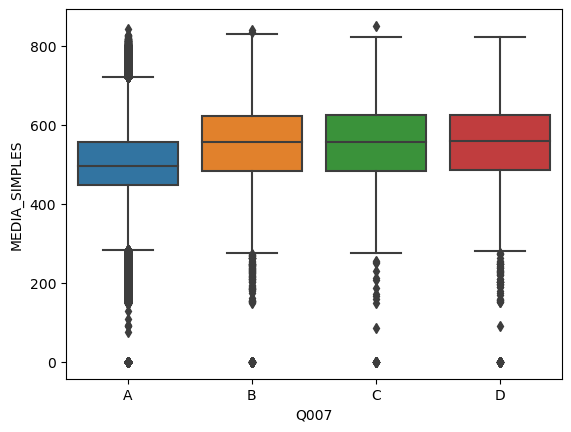

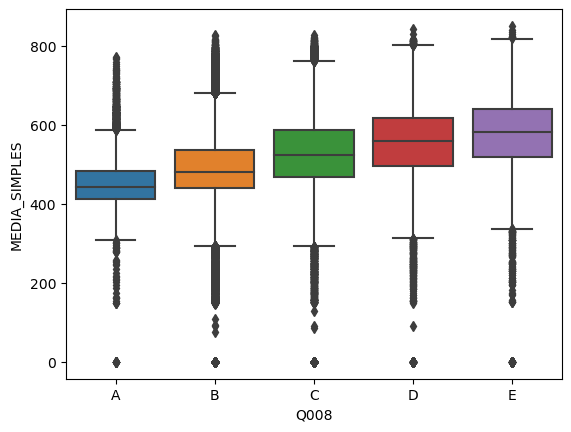

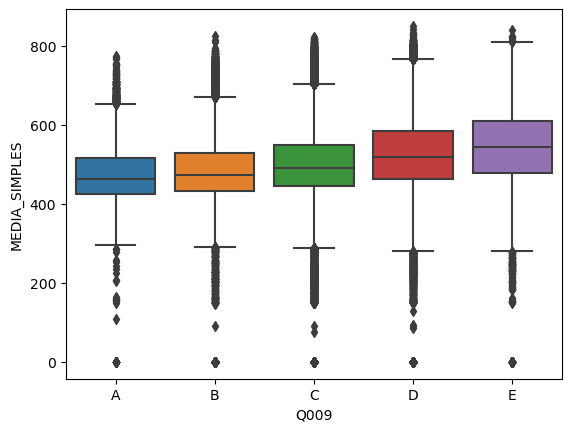

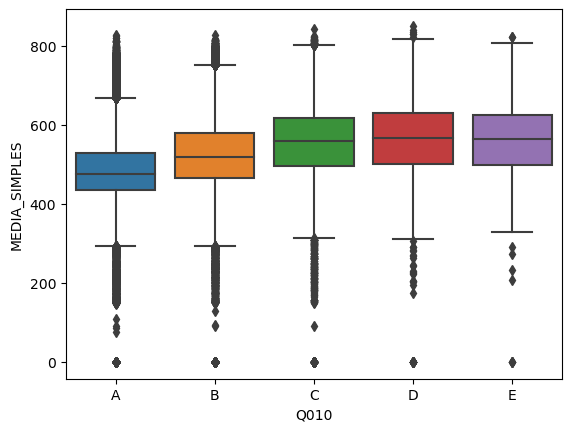

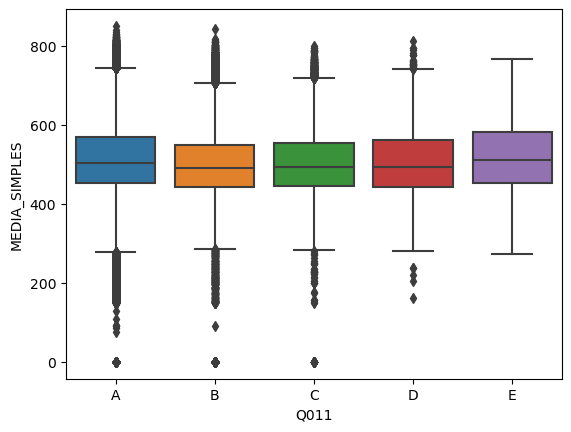

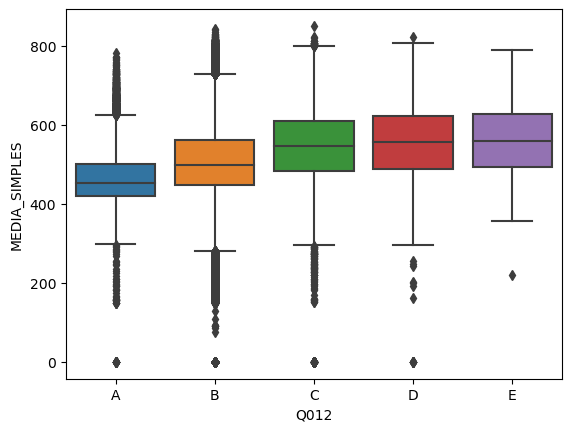

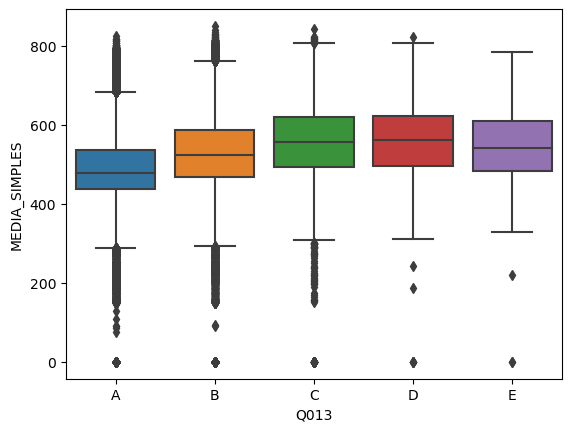

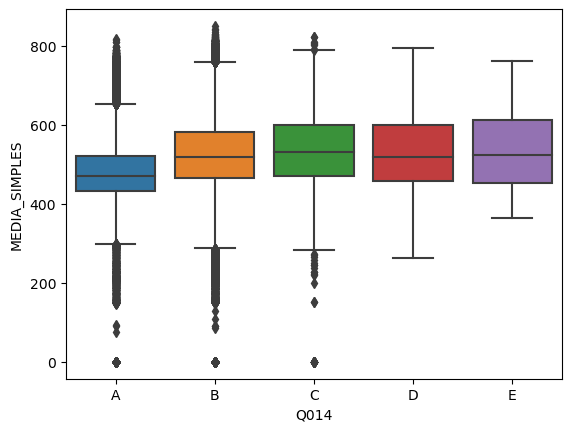

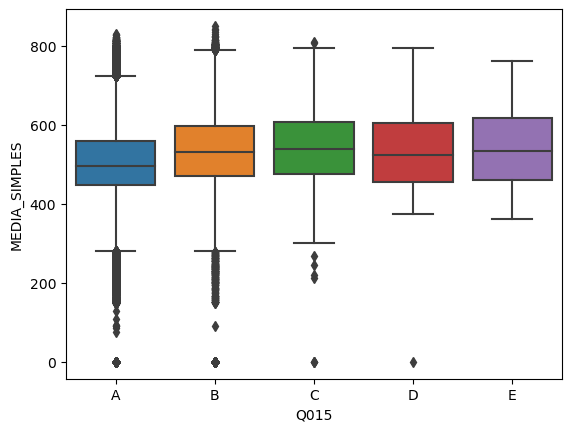

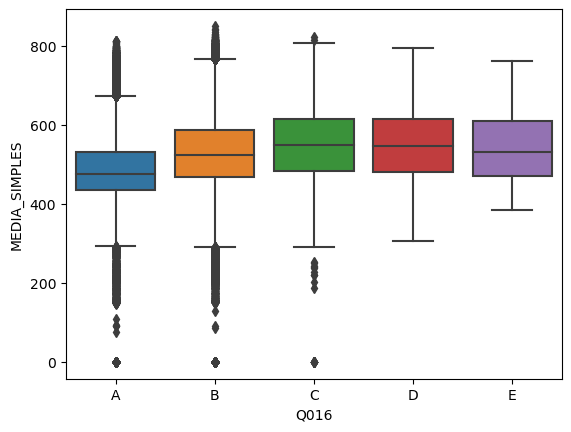

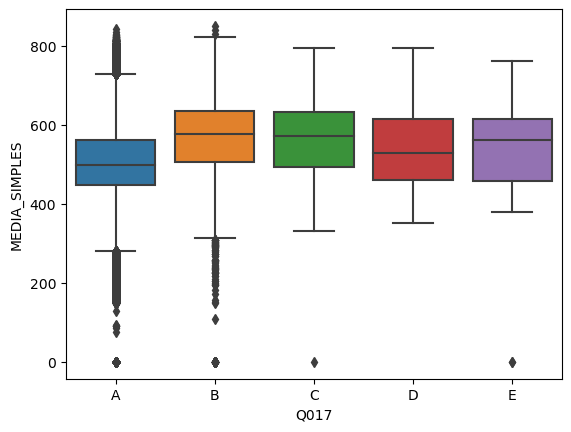

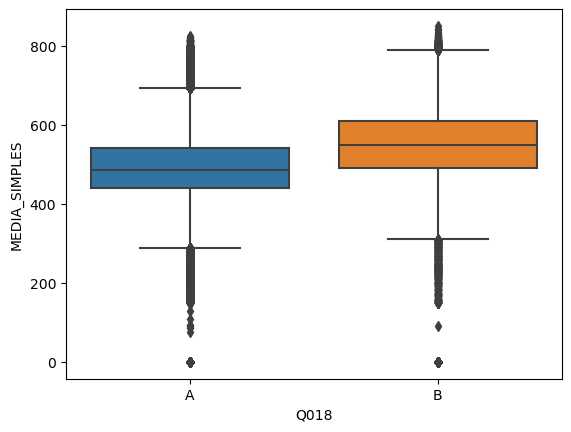

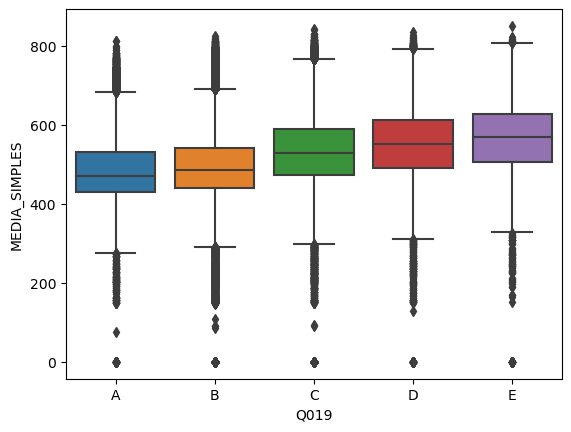

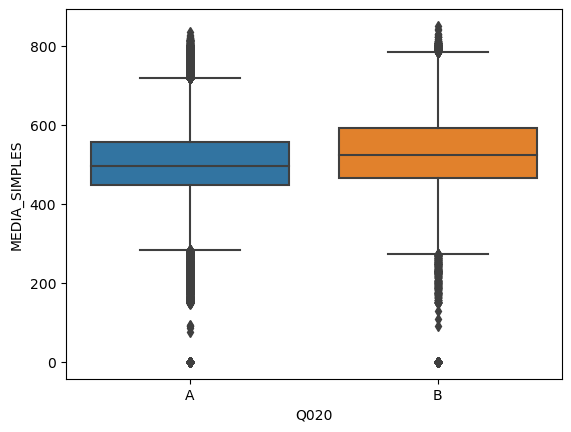

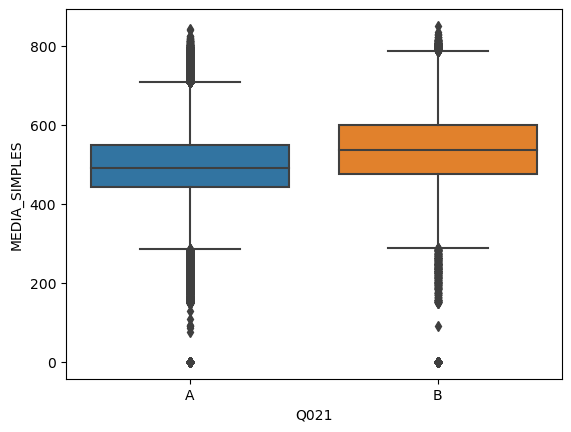

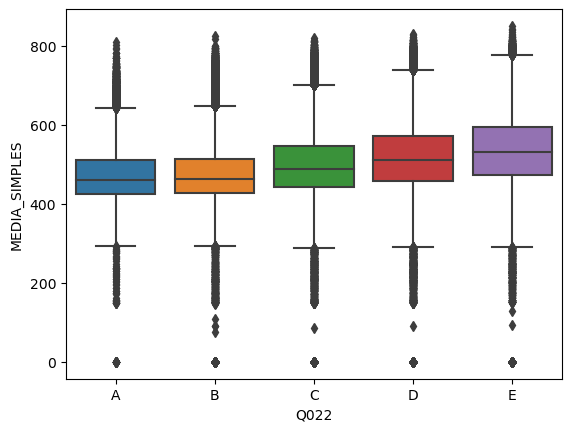

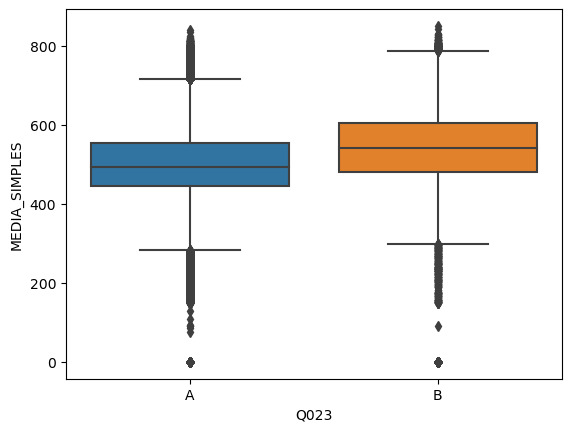

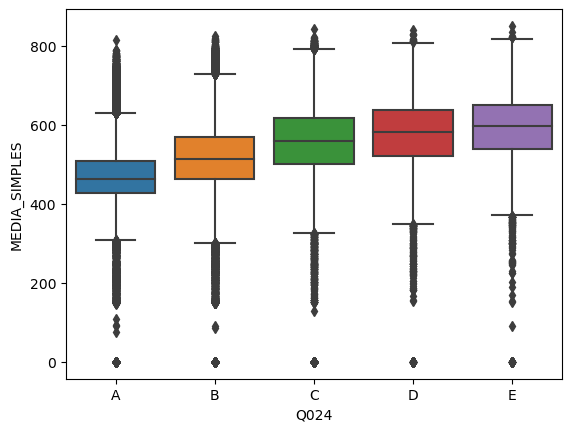

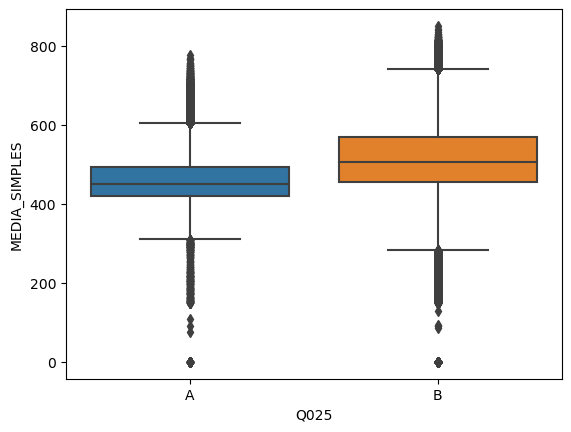

In [17]:
for coluna in variaveis_categoricas:
    x = microdados[coluna].unique()
    ordem = np.sort(x[~pd.isnull(x)])
    sns.boxplot(x=coluna, y='MEDIA_SIMPLES', data=microdados, order=ordem)
    plt.show()

- Tendência de diminuição da nota, conforme a faixa etária avança. A mesma tendência é observada no estado civil e na pergunta 5 (quantas pessoas residem no lar do candidado).
- Apesar de serem mais mulheres na prova, a mediana mais alta é na nota masculina.
- Pessoas declaradas brancas tendem a conseguir melhores médias na prova.
- Os candidatos que não concluíram e não estão cursando o Ensino Médio têm desempenho inferior.
- Inscritos oriundos de escola particular têm nota melhor que os que não deram a informação ou vieram da pública.
- Treineiros e não treineiros não se distinguem muito no desempenho.
- Os candidatos que escolheram inglês como nota mais alta, tendem a ter melhores médias.
- Tendência de aumento da nota conforme as categorias avançam nas perguntas: 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 18-25 (**a última categoria nas questões 1-4 identifica os candidatos que não souberam a resposta**).
- As demais variáveis têm resultados mistos.

## Variável quantitativa

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='MEDIA_SIMPLES'>

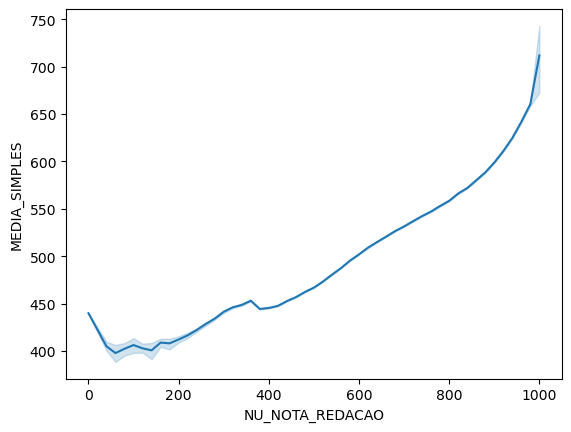

In [18]:
variavel_numerica = microdados['NU_NOTA_REDACAO']
sns.lineplot(data = microdados, x = variavel_numerica, y = 'MEDIA_SIMPLES')

É visível a tendência de aumento da média nas provas objetivas, conforme a nota na redação aumenta, principalmente após os 400 pontos.

## Remoção de valores nulos
Já que as colunas inúteis foram removidas, o foco é na remoção de valores nulos naquelas que podem trazer informações.
Poderia ser o caso de se fazer uma imputação, com a média ou mediana das amostras ou outro valor arbitrário, mas tal ação muda a distribuição das variáveis, caso haja muitos valores nulos. Nesse caso, optou-se por remover os registros contendo nulos por completo, pois o tamanho do conjunto permite extração de informações mesmo com essas remoções.

In [19]:
# Nas perguntas Q001 a Q025 há poucos valores nolos, a remoção não implica perda de muita informação nas variáveis
# Outras colunas representam o problema oposto: são muitos valores faltantes
microdados.dropna(inplace = True)
microdados.reset_index(inplace=True, drop=True)

In [20]:
microdados.isna().sum().sort_values()

TP_FAIXA_ETARIA     0
Q010                0
Q011                0
Q012                0
Q013                0
Q014                0
Q015                0
Q016                0
Q017                0
Q018                0
Q019                0
Q020                0
Q021                0
Q022                0
Q023                0
Q024                0
Q009                0
Q008                0
Q007                0
Q006                0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
Q025                0
IN_TREINEIRO        0
TP_LINGUA           0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q003                0
Q004                0
Q005                0
SG_UF_PROVA         0
MEDIA_SIMPLES       0
dtype: int64

Todos os dados faltantes foram removidos com sucesso.

In [21]:
microdados

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MEDIA_SIMPLES
0,5,F,1,1,1,1,3,1,0,MG,1,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,523.600
1,12,M,1,1,1,1,11,1,0,AL,1,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,504.375
2,3,M,1,3,1,2,0,2,0,CE,0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,639.500
3,2,F,1,3,1,2,0,2,0,CE,1,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,517.575
4,9,F,0,3,1,1,6,1,0,RS,1,480.0,B,C,B,B,3.0,C,A,B,D,A,A,B,B,B,A,B,A,A,B,B,A,C,A,A,B,466.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378373,15,F,1,1,1,4,0,1,0,SP,1,240.0,B,B,D,D,4.0,D,A,C,D,C,A,B,B,B,B,A,A,A,B,A,A,D,A,B,B,444.475
2378374,14,M,2,3,1,1,15,1,0,MG,1,320.0,H,C,F,B,3.0,E,A,B,C,B,A,B,A,B,A,B,A,A,B,B,A,C,B,B,B,475.175
2378375,10,M,1,1,1,1,8,1,0,RJ,0,640.0,E,E,B,B,3.0,B,A,B,B,A,A,B,B,A,A,A,A,B,B,A,B,D,B,C,B,622.875
2378376,5,F,1,3,1,1,1,1,0,AM,1,540.0,C,H,A,A,8.0,A,A,B,C,A,A,A,B,A,A,A,A,A,B,A,A,C,A,A,B,413.600


## Correlação entre variáveis

Não basta apenas observar a relação das variáveis preditoras com a variável alvo, precisa-se analisar a correlação das variáveis preditoras entre si.
### Mapeamento de categorias

In [22]:
# Transformação das categorias das variáveis em números, para avaliar a correlação entre elas
a_h_mapping = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7}
a_f_mapping = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5}
a_q_mapping = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16}
a_d_mapping = {'A':0, 'B':1,'C':2,'D':3}
a_e_mapping = {'A':0, 'B':1,'C':2,'D':3,'E':4}
a_b_mapping = {'A':0, 'B':1}
m_f_mapping = {'F':0, 'M':1}

n_categorias_colunas = {col:microdados[col].nunique() for col in microdados}

a_h_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 8]
a_f_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 6]
a_q_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 17]
a_d_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 4 and coluna != 'TP_ST_CONCLUSAO']
a_e_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 5 and coluna != 'TP_ESTADO_CIVIL' 
               and coluna !='TP_NACIONALIDADE']
a_b_colunas = [coluna for coluna in n_categorias_colunas if n_categorias_colunas[coluna] == 2 and coluna != 'TP_SEXO' 
               and coluna !=  'IN_TREINEIRO' and coluna !=  'TP_LINGUA']

for coluna in a_h_colunas:
    microdados[coluna] = microdados[coluna].map(a_h_mapping)

for coluna in a_f_colunas:
    microdados[coluna] = microdados[coluna].map(a_f_mapping)
    
for coluna in a_q_colunas:
    microdados[coluna] = microdados[coluna].map(a_q_mapping)
    
for coluna in a_d_colunas:
    microdados[coluna] = microdados[coluna].map(a_d_mapping)   

for coluna in a_e_colunas:
    microdados[coluna] = microdados[coluna].map(a_e_mapping)   

for coluna in a_b_colunas:
    microdados[coluna] = microdados[coluna].map(a_b_mapping) 

microdados['TP_SEXO'] = microdados['TP_SEXO'].map(m_f_mapping)

In [23]:
microdados

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MEDIA_SIMPLES
0,5,0,1,1,1,1,3,1,0,MG,1,760.0,5,5,1,1,3.0,3,0,1,2,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,523.600
1,12,1,1,1,1,1,11,1,0,AL,1,560.0,1,1,1,1,3.0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,504.375
2,3,1,1,3,1,2,0,2,0,CE,0,780.0,1,1,1,1,6.0,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,639.500
3,2,0,1,3,1,2,0,2,0,CE,1,780.0,3,4,5,3,4.0,2,0,1,2,0,0,1,0,1,0,1,0,0,1,0,1,4,0,1,1,517.575
4,9,0,0,3,1,1,6,1,0,RS,1,480.0,1,2,1,1,3.0,2,0,1,3,0,0,1,1,1,0,1,0,0,1,1,0,2,0,0,1,466.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378373,15,0,1,1,1,4,0,1,0,SP,1,240.0,1,1,3,3,4.0,3,0,2,3,2,0,1,1,1,1,0,0,0,1,0,0,3,0,1,1,444.475
2378374,14,1,2,3,1,1,15,1,0,MG,1,320.0,7,2,5,1,3.0,4,0,1,2,1,0,1,0,1,0,1,0,0,1,1,0,2,1,1,1,475.175
2378375,10,1,1,1,1,1,8,1,0,RJ,0,640.0,4,4,1,1,3.0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,1,3,1,2,1,622.875
2378376,5,0,1,3,1,1,1,1,0,AM,1,540.0,2,7,0,0,8.0,0,0,1,2,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,413.600


<Axes: >

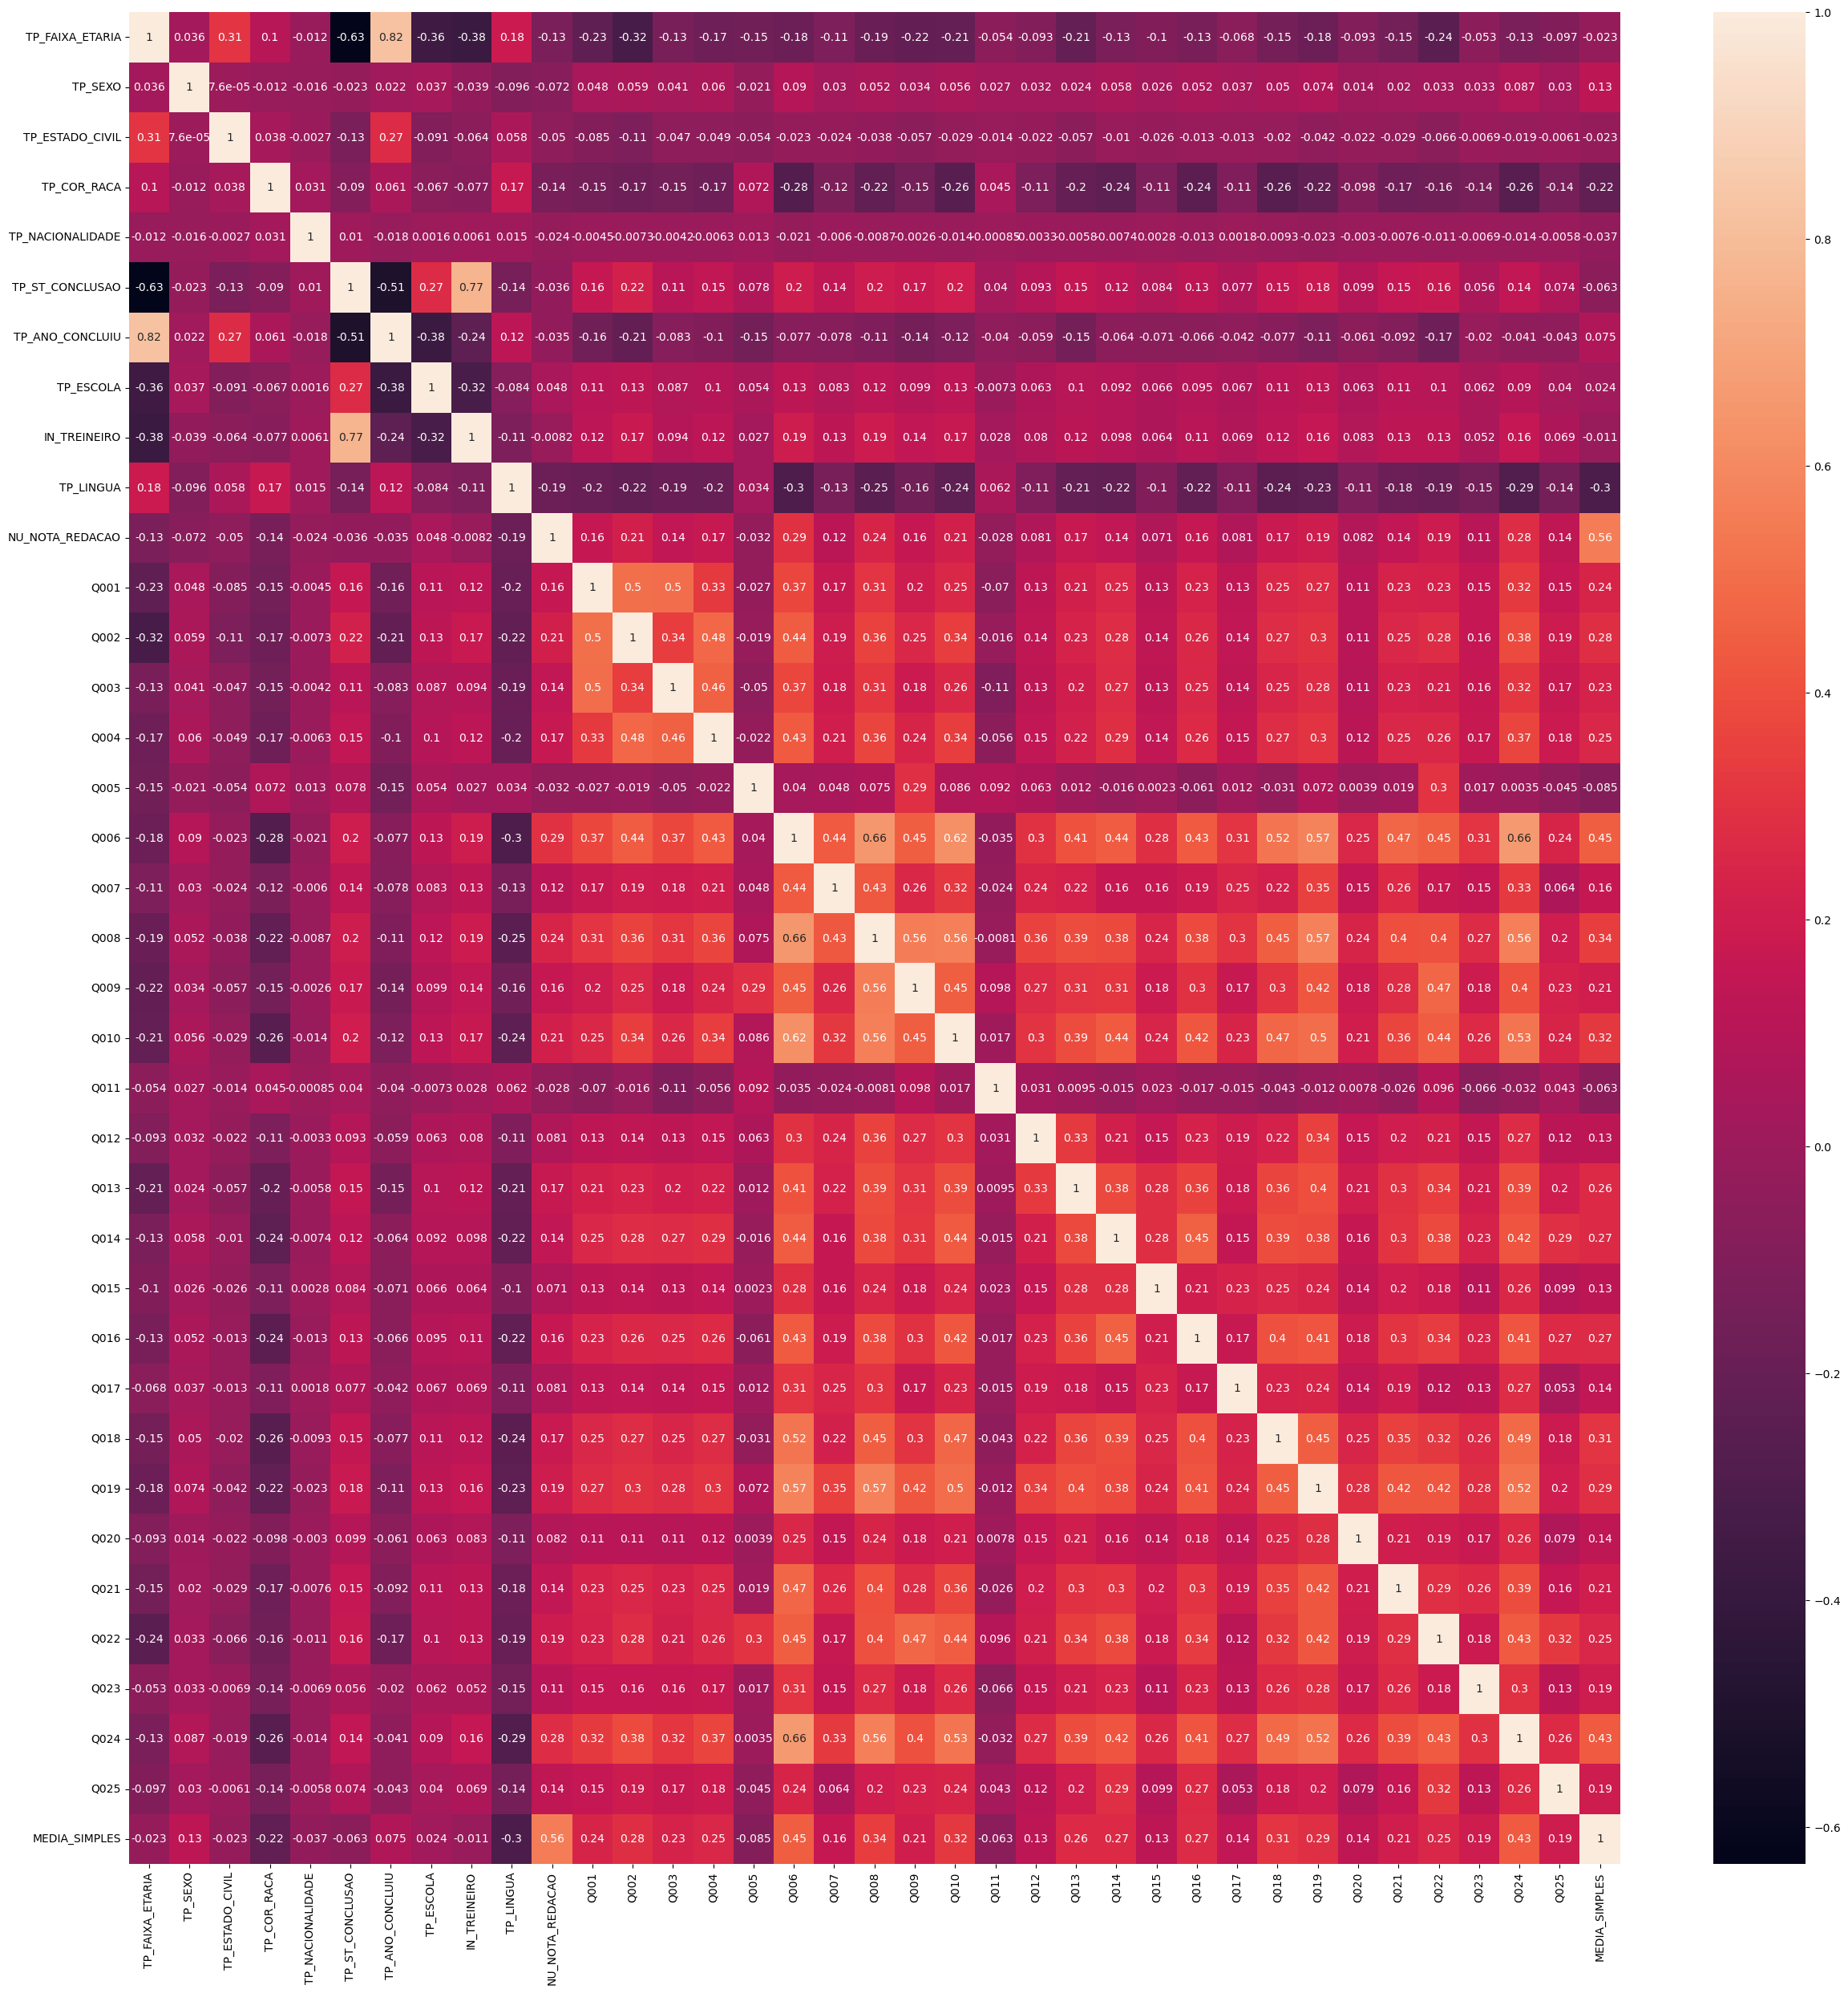

In [24]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(microdados.corr(numeric_only = True), annot=True, ax = ax)

- Correlação fraca: 0.3 a 0.5
- Correlação moderada: 0.5 a 0.7
- Correlação forte: 0.7 a 0.9

Vale tanto para valores negativos quanto positivos, em que o valor positivo indica relação diretamente proporcional (o valor de um aumenta e o outro também aumenta) e linear (no formato de uma reta), enquanto o negativo indica dependência inversamente proporcional (um aumenta e o outro diminui), igualmente linear. A correlação igual a zero indica ausência de relação linear entre as variáveis, mas é necessario investigar, pode haver dependência não linear.

Há correlações consideráveis entre várias variáveis preditoras. As perguntas estão especialmente correlacionadas entre elas.

In [25]:
microdados.to_csv('microdados_limpos', index=False)

No próximo notebook, vamos analisar a importância das variáveis e o grau de multicolinearidade presente no conjunto.